<a href="https://colab.research.google.com/github/Olagrace837/Project-2/blob/main/florescent_LineGraph__Excercise_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1 Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
url='https://raw.githubusercontent.com/Olagrace837/Project-2/main/Exercise%202.csv'
# Read the CSV without specifying usecols to inspect the actual column names
df = pd.read_csv(url)
print("Actual columns in the CSV:")
print(df.columns.tolist())

# The original columns_to_read was incorrect, but the plotting uses numerical indices.
# If specific columns were needed by name, columns_to_read would need to be updated to:
# columns_to_read = ['time_h', 'Molecule_A1', 'Molecule_A2', 'Molecule_A3', 'Molecule_B1', 'Molecule_B_2', 'Molecule_B3']
# df=pd.read_csv(url, usecols=columns_to_read)
# df

Actual columns in the CSV:
['time_h', 'Molecule_A1', 'Molecule_A2', 'Molecule_A3', 'Molecule_B1', 'Molecule_B_2', 'Molecule_B3']


In [ ]:

#   Show the first few rows
print(df.head(7))

   time_h  Molecule_A1  Molecule_A2  Molecule_A3  Molecule_B1  Molecule_B_2  \
0       0   103.943936   115.448803   107.127328    90.607703     62.619445   
1       4   106.927459   129.384281   127.863836   101.489787     86.976959   
2       8   180.764015   153.835569   175.114521   115.193249    100.702744   
3      12   270.151550   258.685728   259.930339   123.615196    124.024084   
4      16   328.041422   352.923463   430.681180   178.102825    169.495632   
5      20   482.763975   550.191566   510.462047   231.692484    258.124926   
6      24   653.303989   646.913586   630.294067   299.767411    276.124882   

   Molecule_B3  
0    92.503303  
1    86.580267  
2   100.817420  
3   147.005757  
4   170.918072  
5   204.989312  
6   270.294339  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
url='https://raw.githubusercontent.com/Olagrace837/Project-2/main/Exercise%202.csv'
# Read the CSV without specifying usecols to inspect the actual column names
df = pd.read_csv(url)
print("Actual columns in the CSV:")
print(df.columns.tolist())

# The original columns_to_read was incorrect, but the plotting uses numerical indices.
# If specific columns were needed by name, columns_to_read would need to be updated to:
# columns_to_read = ['time_h', 'Molecule_A1', 'Molecule_A2', 'Molecule_A3', 'Molecule_B1', 'Molecule_B_2', 'Molecule_B3']
# df=pd.read_csv(url, usecols=columns_to_read)
# df

# Step 5 Tidy to long format and compute mean ± SEM per flourescent & time ===
time_col = df.columns[0]                       # first column (e.g., 'Hours')
value_cols = df.columns[1:]                    # replicate columns

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='Flourescent',
                  value_name='Intensity')

# Remove trailing replicate number to get the base flourescent name (e.g., "Molecule_A1" -> "Molecule_A")
# Modified regex to also remove an optional underscore before the digit
long_df['Flourescent'] = long_df['Flourescent'].str.replace(r'_?\d+$', '', regex=True)

# Add print to check unique values after replace
print("Unique values in 'Flourescent' after replace:", long_df['Flourescent'].unique())


# mean and SEM = std/sqrt(n) for each time × flourescent
summary = (long_df
           .groupby([time_col, 'Flourescent'], as_index=False)
           .agg(mean=('Intensity', 'mean'),
                sem =('Intensity', lambda x: x.std(ddof=1) / np.sqrt(len(x)))))

print("Summary (first rows):\n", summary.head(), "\n")

Actual columns in the CSV:
['time_h', 'Molecule_A1', 'Molecule_A2', 'Molecule_A3', 'Molecule_B1', 'Molecule_B_2', 'Molecule_B3']
Unique values in 'Flourescent' after replace: ['Molecule_A' 'Molecule_B']
Summary (first rows):
    time_h Flourescent        mean       sem
0       0  Molecule_A  108.840022  3.429795
1       0  Molecule_B   81.910151  9.660863
2       4  Molecule_A  121.391859  7.245506
3       4  Molecule_B   91.682338  4.905062
4       8  Molecule_A  169.904702  8.198414 



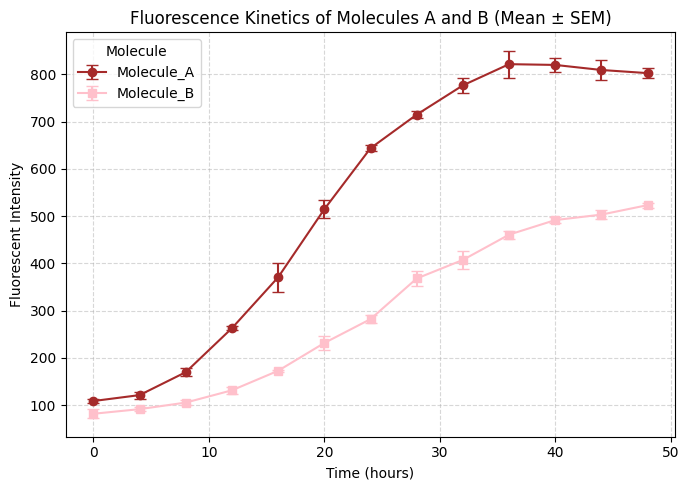

In [8]:
# === 4) Plot mean curves with SEM error bars ===
plt.figure(figsize=(7,5))

# Molecule_A: blue line
plt.errorbar(summary[summary['Flourescent']=='Molecule_A'][time_col],
             summary[summary['Flourescent']=='Molecule_A']['mean'],
             yerr=summary[summary['Flourescent']=='Molecule_A']['sem'],
             fmt='-o', capsize=4, color='Brown', label='Molecule_A')

# Molecule_B: red line
plt.errorbar(summary[summary['Flourescent']=='Molecule_B'][time_col],
             summary[summary['Flourescent']=='Molecule_B']['mean'],
             yerr=summary[summary['Flourescent']=='Molecule_B']['sem'],
             fmt='-s', capsize=4, color='pink', label='Molecule_B')

plt.xlabel("Time (hours)")
plt.ylabel("Fluorescent Intensity")
plt.title("Fluorescence Kinetics of Molecules A and B (Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Molecule")
plt.tight_layout()
plt.show()

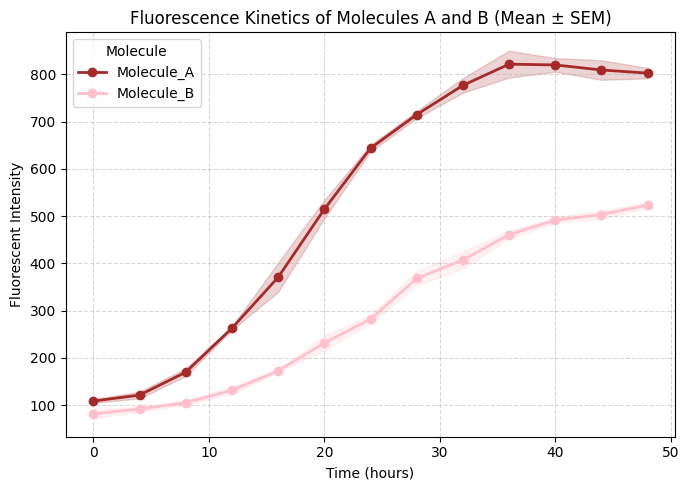

In [7]:
# === Step 6: Plot mean curves with SEM shading and custom colors ===
plt.figure(figsize=(7,5))

# --- Start of code moved from jFbUm4zIuQNa to define 'summary' and its dependencies ---
# Assuming 'df' is already defined from a previous cell.
# This code is included here to ensure 'summary' and its dependencies are available for plotting.
time_col = df.columns[0] # first column (e.g., 'Hours')
value_cols = df.columns[1:] # replicate columns

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='Flourescent',
                  value_name='Intensity')

# Remove trailing replicate number to get the base flourescent name (e.g., "Molecule_A1" -> "Molecule_A")
# Modified regex to also remove an optional underscore before the digit
long_df['Flourescent'] = long_df['Flourescent'].str.replace(r'_?\d+$', '', regex=True)

# mean and SEM = std/sqrt(n) for each time \u00d7 flourescent
summary = (long_df
           .groupby([time_col, 'Flourescent'], as_index=False)
           .agg(mean=('Intensity', 'mean'),
                sem =('Intensity', lambda x: x.std(ddof=1) / np.sqrt(len(x)))))
# --- End of moved code ---

# Define colors for each strain
color_map = {
    'Molecule_A': 'brown',
    'Molecule_B': 'pink'
}

for strain, sub in summary.groupby('Flourescent'):
    sub = sub.sort_values(time_col)
    x = sub[time_col].values
    y = sub['mean'].values
    e = sub['sem'].values

    # Pick color (default gray if strain not in color_map)
    color = color_map.get(strain, 'gray')

    # Plot line + markers
    plt.plot(x, y, marker='o', label=strain, color=color, linewidth=2)

    # SEM shading
    plt.fill_between(x, y - e, y + e, alpha=0.2, color=color)

plt.xlabel("Time (hours)")
plt.ylabel("Fluorescent Intensity")
plt.title("Fluorescence Kinetics of Molecules A and B (Mean \u00b1 SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Molecule")
plt.tight_layout()
plt.show()
#\tBoth molecules increase steadily in fluorescence intensity over time, but Molecule A shows higher fluorescence than Molecule B throughout the experiment